# Logistic Regression (Basic - ANG)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('logreg1',names=['Exam1','Exam2','Admitted'])

df.head()



,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.describe()

,Exam1,Exam2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


# EDA

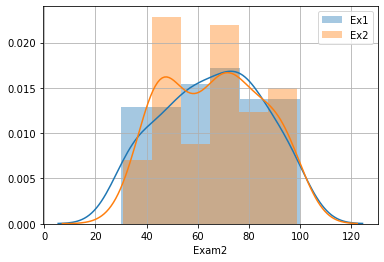

In [4]:
sns.distplot(df['Exam1'],label='Ex1')
sns.distplot(df['Exam2'],label='Ex2')

plt.legend()
plt.grid()

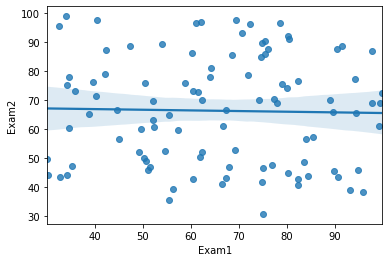

In [5]:
sns.regplot(df['Exam1'],df['Exam2'])

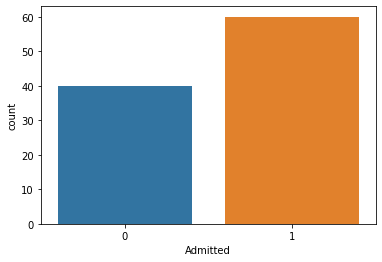

In [6]:
sns.countplot(df['Admitted'])

In [7]:
#Let's observe the score pattern of who's admitted and who's not.
d_0 = df[df['Admitted'] == 0]

d_1 = df[df['Admitted'] == 1]

In [8]:
d_0['Exam1'].mean() + d_0['Exam2'].mean()

106.65269319478824

In [9]:
d_1['Exam1'].mean() + d_1['Exam2'].mean()

148.67532477920798

In [10]:
#So, clearly, the selected candidates beat the non selected ones pn score by a huge margin.

Text(0.5, 1.0, 'The Sigmoid Function')

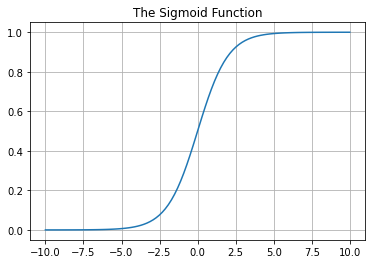

In [11]:
x = np.linspace(-10,10,100)

y = 1/(1 + np.exp(-x))

plt.plot(x,y)
plt.grid()
plt.title('The Sigmoid Function')

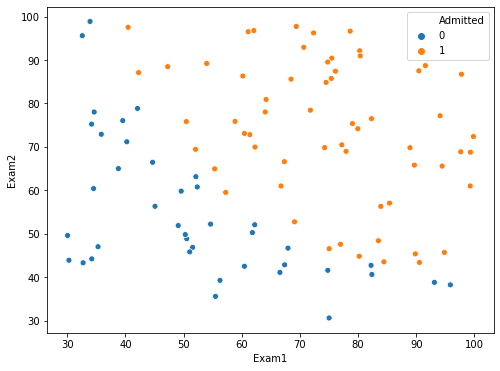

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['Exam1'], df['Exam2'], hue=df['Admitted'])

In [15]:
#So basically we have to find the decision boundary in this case. 

In [5]:
#Let's create a function for sigmoid

def sigmoid(x):
    
    s = 1 / (1 + np.exp(-x))
    
    return s

In [6]:
x = np.linspace(-10,10)

y = sigmoid(x)

In [7]:
#sigmoid(0) should exactly give you 0.5. Let's test that out. 
sigmoid(0)

0.5

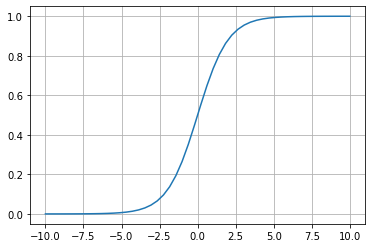

In [8]:
plt.plot(x,y)
plt.grid()

# Cost Function and Gradient.

### $ Z = \theta^{T} X $

### $ h_{\theta}(X) = \sigma(Z) $

### $ J(\theta) = \frac{1}{m} \sum [-y log(h_{\theta}(x)) -(1-y)log(1 - h_{\theta}(x) ] $

### $ \frac {\partial J(\theta)}{\partial \theta} = \frac{1}{m} \sum [(h_{\theta}(x) -y) * x ] $

Note that the Gradient Formula is very similar to the Linear Regression Problem. 
Just that the Definition of h(x) is different.

In [39]:
#Our z looks Like this - Z = a + bx1 + cx2
x0 = np.ones(len(df))
x1 = np.array(df['Exam1'])
x2 = np.array(df['Exam2'])

X = np.zeros((100,3))

X[:,0] = x0
X[:,1] = x1
X[:,2] = x2

# X.shape -- 100x3

y = np.array(df['Admitted']).reshape(100,1)

# y.shape

# X.shape

# theta = np.zeros((3,1))

# Z = np.dot(X,theta)

# Z.shape -- 100x1

In [47]:
def cost(theta,X,y):
    
    #let's say theta is 3x1
    #X is 100x3
    #therefore z is (100x3)*(3x1) = 100x1
    
    Z = np.dot(X,theta)
    
    h = sigmoid(Z)
    
    m = 100
    
    L = y*np.log(h) + (1-y)*np.log(1 - h)
    
    J = -1*(1/m)*np.sum(L)
    
    return J

In [48]:
#Let's see how far off reality we are with an initial guess of parameters.
theta = np.zeros((3,1))

cost(theta,X,y)

0.6931471805599453


### $ \frac {\partial J(\theta)}{\partial \theta} = \frac{1}{m} \sum [(h_{\theta}(x) -y) * x ] $
    

In [49]:
#Gradient

def gradient(theta , X, y):
    
    #Note-
    #1. theta - 3x1
    #2. X - 100x3
    #3. y = 100x1
    #4. h = 100x1
    # (h - y) - 100x1 - T - 1x100 dot 100x3 -- 1x3
    g = np.zeros(theta.shape)
    
    Z = np.dot(X,theta)
    
    h = sigmoid(Z)
    
    m = len(X)
    
    
    dg0 = (1/m)*np.sum((h-y)*(X[:,0].reshape(100,1)))
    dg1 = (1/m)*np.sum((h-y)*(X[:,1].reshape(100,1)))
    dg2 = (1/m)*np.sum((h-y)* (X[:,2].reshape(100,1)))
    
    g[0] = dg0
    g[1] = dg1
    g[2] = dg2

                         
    return g

In [46]:
# gradient(theta,X,y)


In [38]:
# # import scipy.optimize as opt
# theta = np.zeros((3,1))
# l = []
# for e in range(100000):

#     c = cost(theta,X,y)
    
#     theta = theta - 0.01*gradient(theta,X,y)
    
#     l.append(c)
    
    

In [50]:
import scipy.optimize as opt
# theta= np.zeros((3,1))
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)

In [51]:
res

     fun: 68.58826104524884
     jac: array([  6.8928685 , -92.00156937,  -7.60471491])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 20
    nhev: 0
     nit: 1
    njev: 12
  status: 2
 success: False
       x: array([4.60628373e-05, 5.53178590e-03, 5.18798469e-03])

In [24]:
theta

array([[-0.0016695],
       [ 0.009763 ],
       [ 0.0011226]])

In [41]:
yp = np.dot(X,theta)

df['Pred. Probs'] = yp

In [42]:
df

,Exam1,Exam2,Admitted,Pred. Probs
0,34.623660,78.024693,0,0.423952
1,30.286711,43.894998,0,0.343296
2,35.847409,72.902198,0,0.430149
3,60.182599,86.308552,1,0.682783
4,79.032736,75.344376,1,0.854509
...,...,...,...,...
95,83.489163,48.380286,1,0.867747
96,42.261701,87.103851,1,0.508714
97,99.315009,68.775409,1,1.045150
98,55.340018,64.931938,1,0.611508


In [73]:
v = np.linspace(0.40,0.80,100)
a = []
for b in v:
    #
    label = lambda t : 1 if t>b else 0
    df['yp'] = df['Pred. Probs'].apply(label)
    a.append(len(df[df['yp'] == df['Admitted']]))

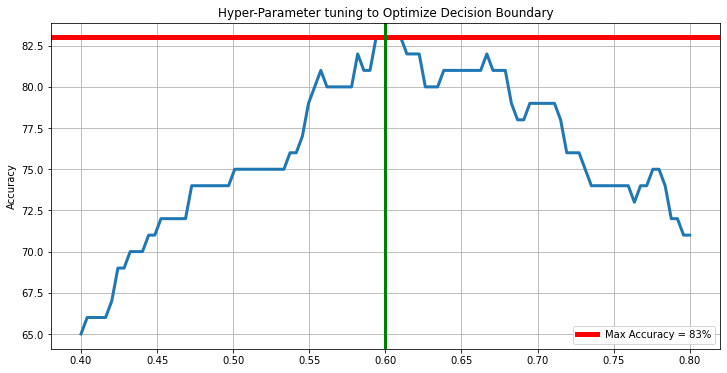

In [82]:
# df['yp'] = df['Pred. Probs'].apply(label)
plt.figure(figsize=(12,6))
plt.plot(v,a,lw = 3)
plt.grid()
plt.axhline(y = max(a),color='r',lw = 5,label='Max Accuracy = 83%')
plt.axvline(x=0.60 , color='g',lw=3)

plt.title('Hyper-Parameter tuning to Optimize Decision Boundary')
plt.ylabel('Accuracy')
plt.legend()


In [71]:
# len(df[df['yp'] == df['Admitted']])

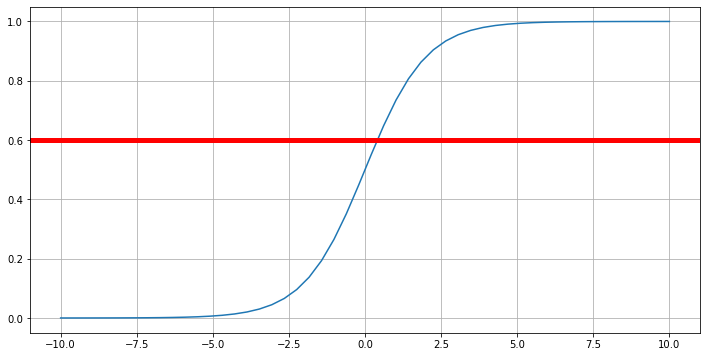

In [84]:
plt.figure(figsize=(12,6))
z = np.linspace(-10,10)
s = 1/(1 + np.exp(-z))

plt.plot(z,s)
plt.axhline(y = 0.60,color='red',lw=5)

plt.grid()

In [85]:
theta

array([[-0.0016695],
       [ 0.009763 ],
       [ 0.0011226]])

In [91]:
# sns.scatterplot(df['Exam1'] , df['Exam2'],hue=df['Admitted'])
# plt.plot(df['Exam1'] , boundary)

In [17]:
w1 = np.ones((4,3))

w2 = np.ones((4,3))

W = np.array([w1 , w2]).reshape(4,3,2)

W

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

In [5]:
X = np.ones((3,10))

In [10]:
print(W)

[[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]]
